In [22]:
import pandas as pd
import   numpy as np              #maths calculation
from  datetime import datetime     #to acces date
import matplotlib.pyplot as plt # for plotting graph
from pandas import Series   # to work on series
%matplotlib inline
import warnings        #to ignore warnings warnings.filterwarnings("ignore")

In [23]:
warnings.filterwarnings("ignore")

In [24]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [25]:
# for not lossing orginal data lets make copy
train_original=train.copy()
test_original=test.copy()

In [26]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [27]:
test.head()


,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [28]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [29]:
A=9
print ('%.3f'%A)


9.000


In [30]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [31]:
train.shape

(18288, 3)

In [32]:
test.shape

(5112, 2)

In [33]:
train_original

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [34]:
train['Datetime']=pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
test['Datetime']=pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format="%d-%m-%Y %H:%M")
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format="%d-%m-%Y %H:%M")




In [35]:
for i in (train,test,test_original,train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour
    

In [36]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']


def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2



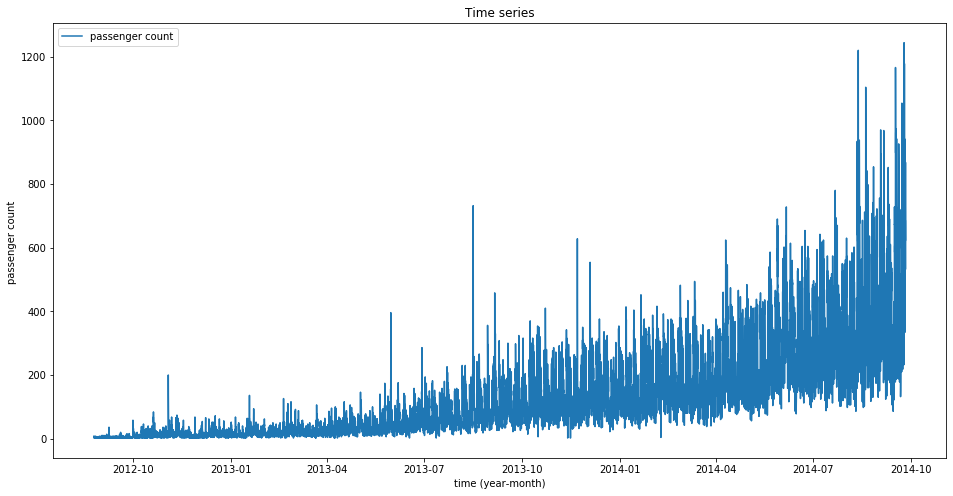

In [37]:
train.index=train['Datetime'] #indexing the datetime to get the time period on the x-axis
df=train.drop('ID',1)# DROP ID TO GET ONLY date time on x-axis
ts=df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='passenger count')
plt.title('Time series')
plt.xlabel("time (year-month)")
plt.ylabel("passenger count ")
plt.legend(loc='best')


















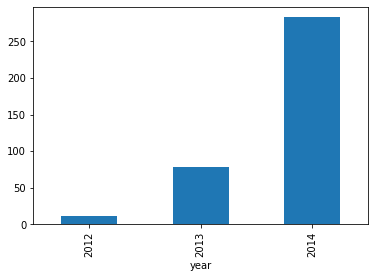

In [38]:
train.groupby('year')['Count'].mean().plot.bar()

In [39]:
t=train['Count']

t=pd.DataFrame(t)


t

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


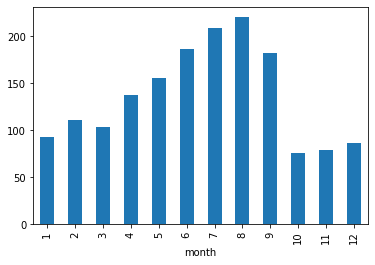

In [40]:
train.groupby('month')['Count'].mean().plot.bar()

In [41]:
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']
valid
Train

AttributeError: 'DataFrame' object has no attribute 'ix'

In [ ]:
Train.Count.plot(figsize=(15,8),title='Daily Ridetship', fontsize=14,label='train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime") 
plt.ylabel("passenger count") 
plt.legend(loc='best')
plt.show()






In [ ]:
dd=np.asarray(Train.Count)
y_hat=valid.copy()
y_hat['naive']=dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='Valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')

plt.legend(loc='best')

plt.title("naive Forecast")
plt.show()
y_hat
valid
dd

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rms)

In [ ]:
y_hat=valid.copy()


In [ ]:
import statsmodels.api as sm

In [ ]:
sm.tsa.seasonal_decompose(Train.Count).plot()

result=sm.tsa.stattools.adfuller(train.Count)
plt.show()